<a href="https://colab.research.google.com/github/yiwenff/RShub_demo/blob/main/Run_Total_RTE_Veg_from_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform vs. Layered Vegetation Brightness Temperature

In [1]:
import datetime
import copy
!pip install https://rshub.zju.edu.cn/projects/rstool-0.1.5.tar.gz -q

## How would vertical distribution of vegetation structure impact Tb?

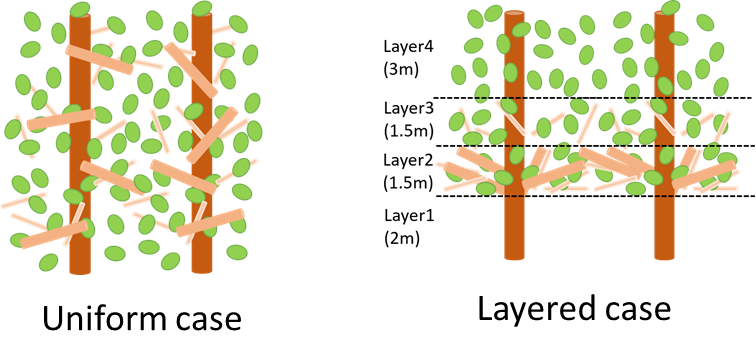

In [2]:
# Define user token
token = 'Enter Your Token Here' # Register an account to get a token
# Chang your task name or project name every time you run a new job
project_name = 'Vegetation Demo 2'
task_name1 = 'Layered Vegetation'
task_name2 = 'Uniform Vegetation'

### Step 1: Define Scenario flag

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======

# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 3

### Step 2: Define observation description

In [4]:
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 2

# 2) Observation characteristics
fGHz = 1.41

### Step 3: Define Algorithm flag

In [5]:
# 1: RT
algorithm = 1

### Step 4: Describe your scenario

In [6]:
scatters1=[[]]
# Branch
types = 1 # 1: cylinder; 0: disc
VM = 0.37 # Volumetric Moisture 
L = 7.85 # Length of the scatterer [m]
D = 0.15 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 10 # upper bound of orientation range of the scatterer (degree)
disbot = 0 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 0.24 # density of the scatterer
scatters1[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]

# Primary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.501 # Volumetric Moisture 
L = 1.41 # Length of the scatterer [m]
D = 0.0288 # Diameter of the scatterer [m]
beta1 = 30 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 3.5 # upper bound of vertical distribution range of the scatterer
NA = 3.12 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Secondary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.444 # Volumetric Moisture 
L = 0.555 # Length of the scatterer [m]
D = 0.0112 # Diameter of the scatterer [m]
beta1 = 35 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 5 # upper bound of vertical distribution range of the scatterer
NA = 34.32 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Leaf
types = 0 # 1: cylinder; 0: disc
VM = 0.58 # Volumetric Moisture 
L = 0.0001 # thickness of the scatterer [m]
D = 0.04 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 7712.64 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])
print(scatters1)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 2, 3.5, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 2, 5, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 2, 8, 7712.64]]


In [7]:
scatters2=copy.deepcopy(scatters1)
# Primary Branch distributed at 2 - 3.5 meters
scatters2[1][6] = 0
scatters2[1][7] = 8

# Secondary Branch distributed at 3.5 - 5 meters
scatters2[2][6] = 0
scatters2[2][7] = 8

# Leaves distributed at 5 - 8 meters
scatters2[3][6] = 0
scatters2[3][7] = 8
print(scatters2)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 0, 8, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 0, 8, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 0, 8, 7712.64]]


In [8]:
data1 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters1,'core_num':2,
    'project_name':project_name,
    'task_name':task_name1,
    'token': token,
    'level_required':1
}

data2 = {
    'scenario_flag': scenario_flag,
    'output_var': output_var,'fGHz': fGHz,
    'algorithm':algorithm,
    'scatters': scatters2,'core_num':2,
    'project_name':project_name,
    'task_name':task_name2,
    'token': token,
    'level_required':1
}

In [9]:
print(data1)

{'scenario_flag': 3, 'output_var': 2, 'fGHz': 1.41, 'algorithm': 1, 'scatters': [[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 2, 3.5, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 2, 5, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 2, 8, 7712.64]], 'core_num': 2, 'project_name': 'Vegetation Demo', 'task_name': 'Demo1 Layered Vegetation', 'token': '6uf0z22#$m!!0095xo**1vy1s*04k!', 'level_required': 1}


## Run models

In [10]:
from rstool import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": 3, "output_var": 2, "fGHz": 1.41, "algorithm": 1, "scatters": [[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 2, 3.5, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 2, 5, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 2, 8, 7712.64]], "core_num": 2, "project_name": "Vegetation Demo", "task_name": "Demo1 Layered Vegetation", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}
{"scenario_flag": 3, "output_var": 2, "fGHz": 1.41, "algorithm": 1, "scatters": [[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 0, 8, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 0, 8, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 0, 8, 7712.64]], "core_num": 2, "project_name": "Vegetation Demo", "task_name": "Demo2 Uniform Vegetation", "token": "6uf0z22#$m!!0095xo**1vy1s*04k!", "level_required": 1}


In [11]:
print(result2)

{'model': 'Vegetation Passive Radiative Transfer (VPRT) Model', 'outpath': 'tUfXY4Y67NrCXtnvZtz7ONSYJX52dr', 'result': 'Job submitted! Check Email for details.'}


In [12]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task1_name} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task2_name} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check Job Status (It may take a long time!)

In [13]:
from rstool import submit_jobs
result=submit_jobs.check_completion(token, project_name, task1_name)
print(result)

{'result': 'Jobs are still running, please wait...'}


# Post Process

In [14]:
from rstool.load_file import load_file

In [16]:
data1 = load_file(token, project_name, task1_name,'1.41')
data_multi = data1.load_veg_TB()
# Read variables into python
TU_all = data_multi['TU_all'] # Tbs
theta_obs = data_multi['theta_obs'] # theta

In [17]:
data2 = load_file(token, project_name, task2_name,'1.41')
data_multi2 = data2.load_veg_TB()
# Read variables into python
TU_all2 = data_multi2['TU_all'] # Tbs
theta_obs2 = data_multi2['theta_obs'] # theta

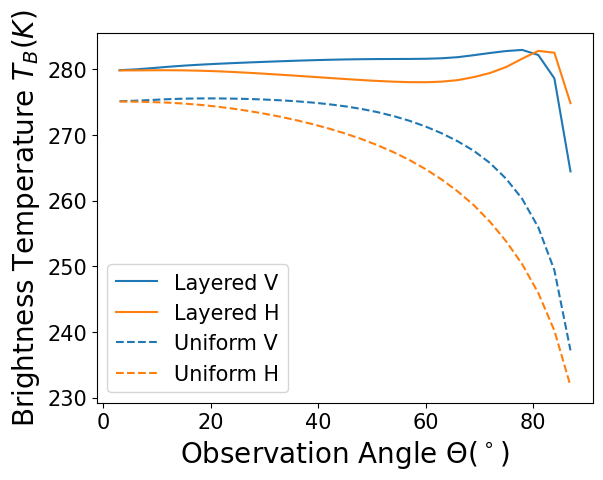

In [18]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs[0,:], TU_all[0,:], color='tab:blue')
ax.plot(theta_obs[0,:], TU_all[1,:], color='tab:orange')
ax.plot(theta_obs2[0,:], TU_all2[0,:], color='tab:blue',linestyle='--')
ax.plot(theta_obs2[0,:], TU_all2[1,:], color='tab:orange',linestyle='--')
ax.set_xlabel('Observation Angle $\Theta(^\circ)$', fontsize = 20) 
ax.set_ylabel('Brightness Temperature $T_B(K)$', fontsize = 20) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
#ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['Layered V', 'Layered H', 'Uniform V', 'Uniform H'],fontsize = 15)